In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# plot settings
sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"})  # Change the color code as needed

# custom color palette: 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))
#sns.set_style("darkgrid")

# for multiple plots
# sns.despine(left=True, bottom=True)

In [3]:
df = pd.read_csv('../data/petfinder-adoption-prediction/eda/df_eda.csv')

In [4]:
df.adoptionspeed.value_counts(normalize=True)

adoptionspeed
4    0.279931
2    0.269259
1    0.233442
3    0.217368
Name: proportion, dtype: float64

In [5]:
pd.crosstab(df.query("type==0").age_bin,df.query("type==0").adoptionspeed,normalize="index")

adoptionspeed,1,2,3,4
age_bin,,,,
0,0.219507,0.319600,0.255121,0.205773
1,0.141140,0.211187,0.234187,0.413487
2,0.210804,0.192601,0.208456,0.388139
3,0.150000,0.268182,0.227273,0.354545


In [6]:
dog_age = pd.crosstab(df.query("type==0").age_bin,df.query("type==0").adoptionspeed,normalize="index")
dog_age = dog_age.reset_index()
dog_age = pd.melt(dog_age, id_vars='age_bin', var_name='adoptionspeed', value_name='value')
dog_age

,age_bin,adoptionspeed,value
0,0,1,0.219507
1,1,1,0.141140
2,2,1,0.210804
3,3,1,0.150000
4,0,2,0.319600
5,1,2,0.211187
6,2,2,0.192601
7,3,2,0.268182
8,0,3,0.255121
9,1,3,0.234187


# Visual

In [14]:
from matplotlib import pyplot

<Figure size 3000x800 with 0 Axes>

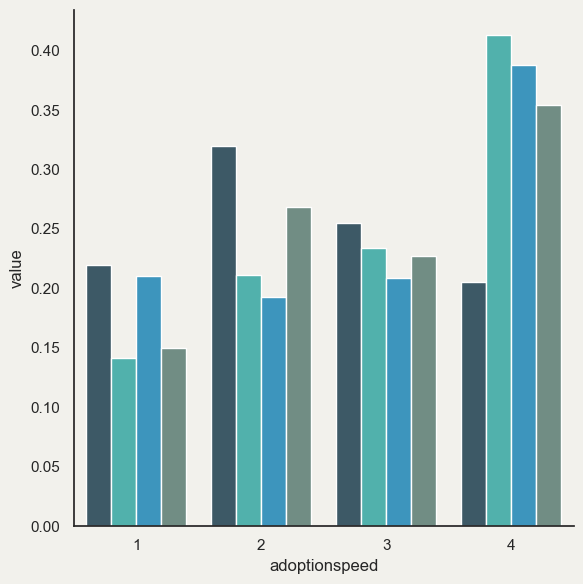

In [30]:
g = plt.figure(figsize=(30,8))
# Plot
g = sns.catplot(
    data=dog_age, kind="bar",
    x="adoptionspeed", y="value", hue="age_bin",
    alpha=1, height=6, legend=False
)

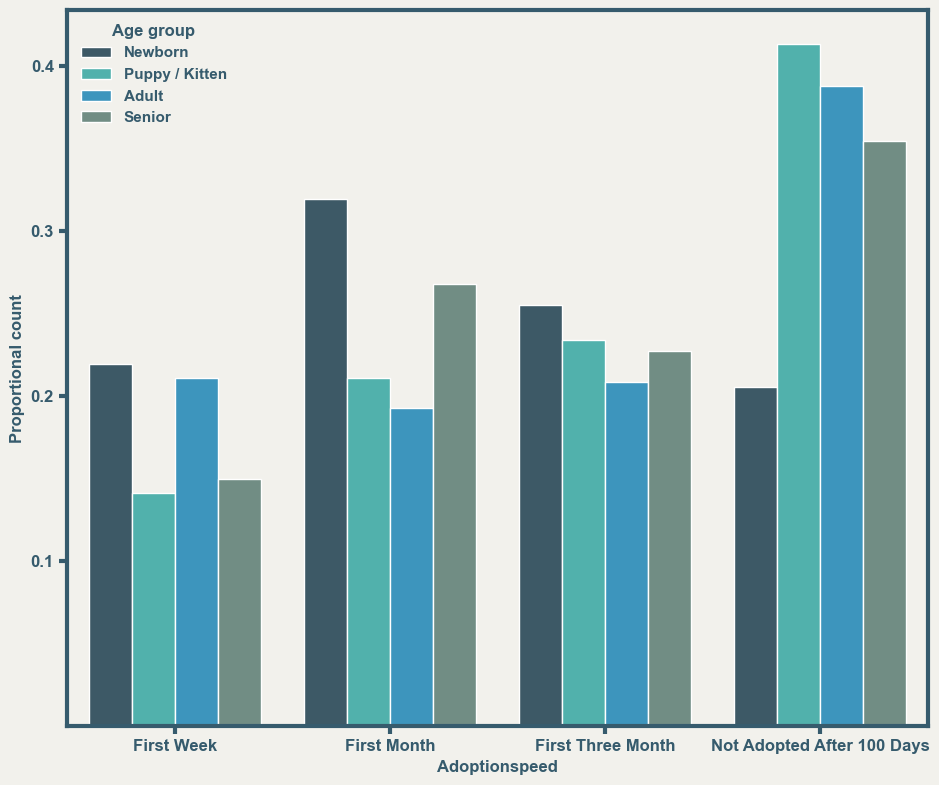

In [45]:
#sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"})  # Change the color code as needed

# Plot
g = sns.catplot(
    data=dog_age, kind="bar",
    x="adoptionspeed", y="value", hue="age_bin",
    alpha=1, height=8,aspect=1.2, legend=False
)


# Make a box around the plot, set the linewidth and color.
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(3)
ax.spines['top'].set_color('#365b6d')  

ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(3)
ax.spines['right'].set_color('#365b6d')  

ax.spines['bottom'].set_linewidth(3)
ax.spines['bottom'].set_color('#365b6d')  

ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_color('#365b6d')  

# Customize tickmarks:
# #plt.tick_params(axis='both',  # 'both' applies to both x and y axes
#                 which='both',  # 'both' applies to both major and minor ticks
#                 color='black',  # Set the tick color
#                 width=15,  # Set the tick width
#                 length=15,  # Set the tick length
#                 direction='out',  # 'in', 'out', or 'inout'
#                 )
plt.tick_params(axis="x", bottom=True, color='#365b6d',width=3) 
plt.tick_params(axis="y", left=True, color='#365b6d',width=3) 

plt.yticks(color='#365b6d',fontsize=12, ticks=[0.1,0.2,0.3,0.4],fontweight='bold')
plt.xticks(color='#365b6d',fontsize=12,fontweight='bold', ticks=[0,1,2,3], labels=['First Week', 'First Month', 'First Three Month', 'Not Adopted After 100 Days'])

legend = ax.legend(title="Age group", loc="upper left",frameon=False, labelcolor='#365b6d')
legend.get_title().set_color('#365b6d')
legend.get_title().set_fontweight('bold')
labellist = ["Newborn", "Puppy / Kitten", "Adult", "Senior"]
for i,label in enumerate(legend.get_texts()):
    label.set_weight('bold')
    label.set_text(labellist[i]) 

g.set_axis_labels("Adoptionspeed", "Proportional count", color = '#365b6d',fontweight='bold')




In [ ]:
plt.savefig('../images/presentation/photoamt.jpg')

In [33]:
df.age_bin.value_counts()

age_bin
0    7952
1    4259
2    2518
3     264
Name: count, dtype: int64